## Import Required Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

## Getting the Data

In [7]:
df = pd.read_csv("dataset.csv")
pd.set_option('display.max_colwidth', None)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Soundtrack),Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Data Cleaning and Preprocessing

In [8]:
df.shape ## how many rows and cols

(114000, 21)

In [9]:
df.columns ## name of cols

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [10]:
df.isnull().sum() ## nulls -> there are 3. Drop them

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [13]:
df = df.dropna() ## drop the null values

In [15]:
df.isnull().sum() ## nulls dropped :)

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [17]:
df.shape ## only 1 row was dropped

(113999, 21)

In [19]:
df.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

## Explatory Data Analysis (EDA)

In [21]:
df.nlargest(10, 'popularity')[['track_name', 'artists', 'popularity']] ## top 10 most popular tracks
## after running the above code, it is evident that there are some duplicates, let's drop them...

,track_name,artists,popularity
20001,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,100
81051,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,100
51664,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap;Quevedo,99
20008,I'm Good (Blue),David Guetta;Bebe Rexha,98
30003,I'm Good (Blue),David Guetta;Bebe Rexha,98
67356,La Bachata,Manuel Turizo,98
68303,La Bachata,Manuel Turizo,98
81210,I'm Good (Blue),David Guetta;Bebe Rexha,98
88410,La Bachata,Manuel Turizo,98
89411,La Bachata,Manuel Turizo,98


In [23]:
df = df.drop_duplicates() ## drop duplicates

In [25]:
df.nlargest(10, 'popularity')[['track_name', 'artists', 'popularity']] ## top 10 most popular tracks
## there are still duplicated, let's drop them by track_name + artist

,track_name,artists,popularity
20001,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,100
81051,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,100
51664,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap;Quevedo,99
20008,I'm Good (Blue),David Guetta;Bebe Rexha,98
30003,I'm Good (Blue),David Guetta;Bebe Rexha,98
67356,La Bachata,Manuel Turizo,98
68303,La Bachata,Manuel Turizo,98
81210,I'm Good (Blue),David Guetta;Bebe Rexha,98
88410,La Bachata,Manuel Turizo,98
89411,La Bachata,Manuel Turizo,98


In [27]:
df = df.drop_duplicates(subset=['track_name', 'artists'])
df.nlargest(10, 'popularity')[['track_name', 'artists', 'popularity']]
## that worked, now, the df is only displaying unique, or distinct, values :)


,track_name,artists,popularity
20001,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,100
51664,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap;Quevedo,99
20008,I'm Good (Blue),David Guetta;Bebe Rexha,98
67356,La Bachata,Manuel Turizo,98
67358,Me Porto Bonito,Bad Bunny;Chencho Corleone,97
67359,Tití Me Preguntó,Bad Bunny,97
20000,Under The Influence,Chris Brown,96
67559,Efecto,Bad Bunny,96
79000,I Ain't Worried,OneRepublic,96
67500,Ojitos Lindos,Bad Bunny;Bomba Estéreo,95


In [29]:
df.shape ## lets check the shape after dropping duplicates -> down to 81,000 rows!

(81343, 21)

## Visualisations (EDA)

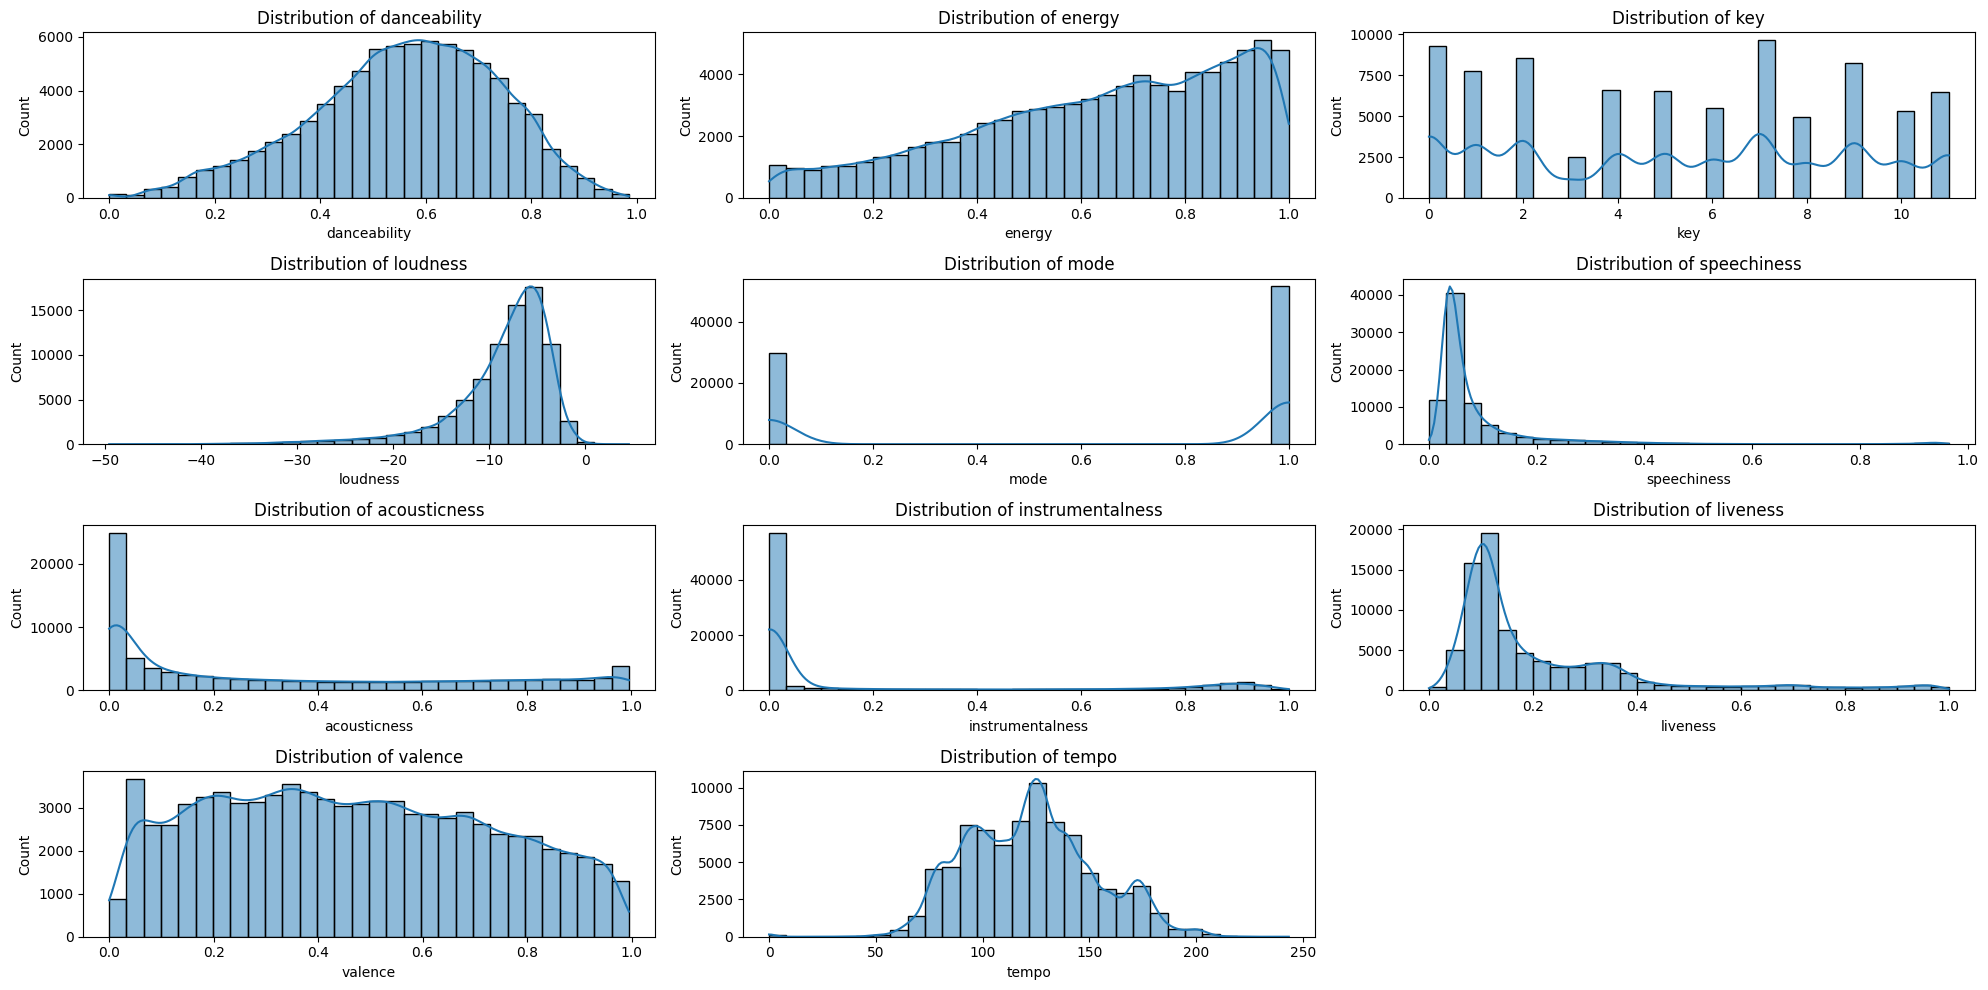

In [31]:
## Visualisation for the distribution of Spotify's parameters regarding the 'mood' of a song
## Spotify documentation for these track parameters -> https://developer.spotify.com/documentation/web-api/reference/get-audio-features

parameters = [
    'danceability',     # -> how suitable a track is for dancing based on tempo, rhythm stability, beat strength etc. Ranges from 0.0 (least), to 1.0 (most).
    'energy',           # -> a measure of intensity and activity, high energy = fast, loud & noisy. Ranges from 0.0 (least), to 1.0 (most).
    'key',              # -> the estimated musical key of the track. Ranges from integer value (0-11), corresponding to musical pitches (C=0, B=11 etc.).
    'loudness',         # -> overall loudness in decibels (dB). Typicall ranges from -60dB to 0dB.
    'mode',             # -> indicates the modality. 1 = major, 0 = minor.
    'speechiness',      # -> amount of spoken in a track. Ranges from 0.0 (least) to 1.0 (most).
    'acousticness',     # -> measure of how acoustic a track is. Ranges from 0.0 (least) to 1.0 (most).
    'instrumentalness', # -> predicts whether a track contains vocals. Higher values approaching 1.0 = likely instrumental.
    'liveness',         # -> detects the presence of an audience. Higher values suggest the track is live. Ranges from 0.0 (least) to 1.0 (most).
    'valence',          # -> musical 'positiveness'. Ranges from 0.0 (least (sad, angry etc.) to 1.0 (happy, joyful etc.)) -> completelty open to interpretation and opinion...
    'tempo'             # -> The overall tempo of the track, in BPM (beats per minute).
]

plt.figure(figsize=(20, 10))
for i, parameter in enumerate(parameters):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[parameter], kde=True, bins=30)
    plt.title(f'Distribution of {parameter}')
    plt.xlabel(parameter)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

/tmp/ipykernel_3570/2265577067.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


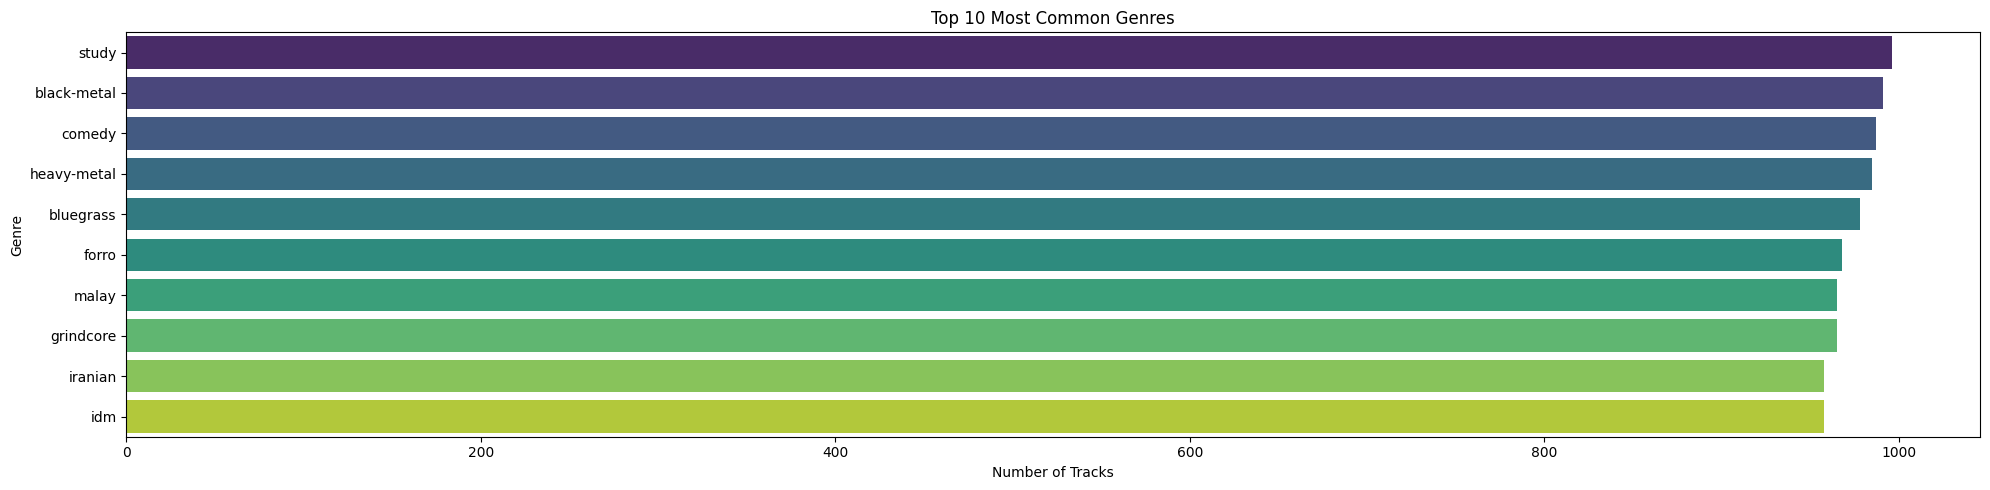

In [33]:
genre_counts = df['track_genre'].value_counts().head(10) ## top 10 genres

plt.figure(figsize=(20, 5))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Number of Tracks')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3570/4044638926.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


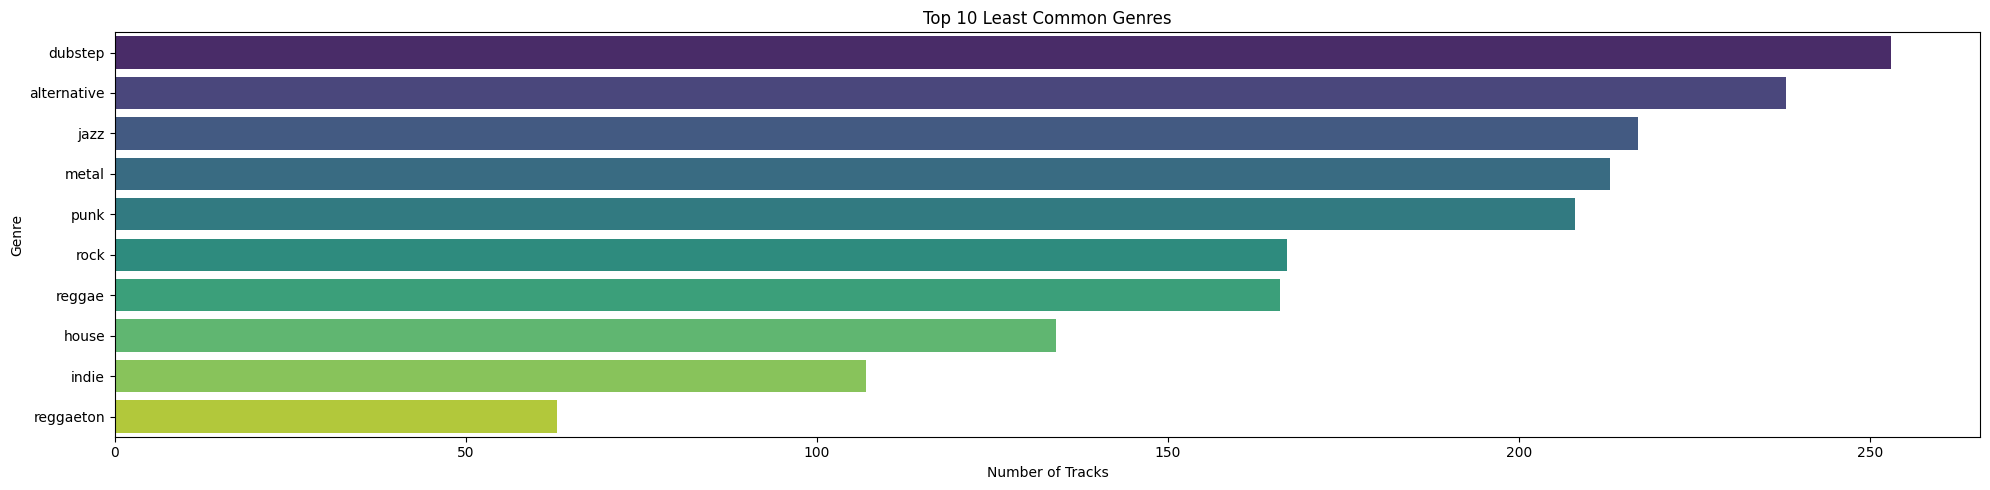

In [35]:
genre_counts = df['track_genre'].value_counts().tail(10) ## bottom 10 genres

plt.figure(figsize=(20, 5))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Least Common Genres')
plt.xlabel('Number of Tracks')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3570/2692009425.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='track_name', data=top_10_popular_tracks, palette='viridis')


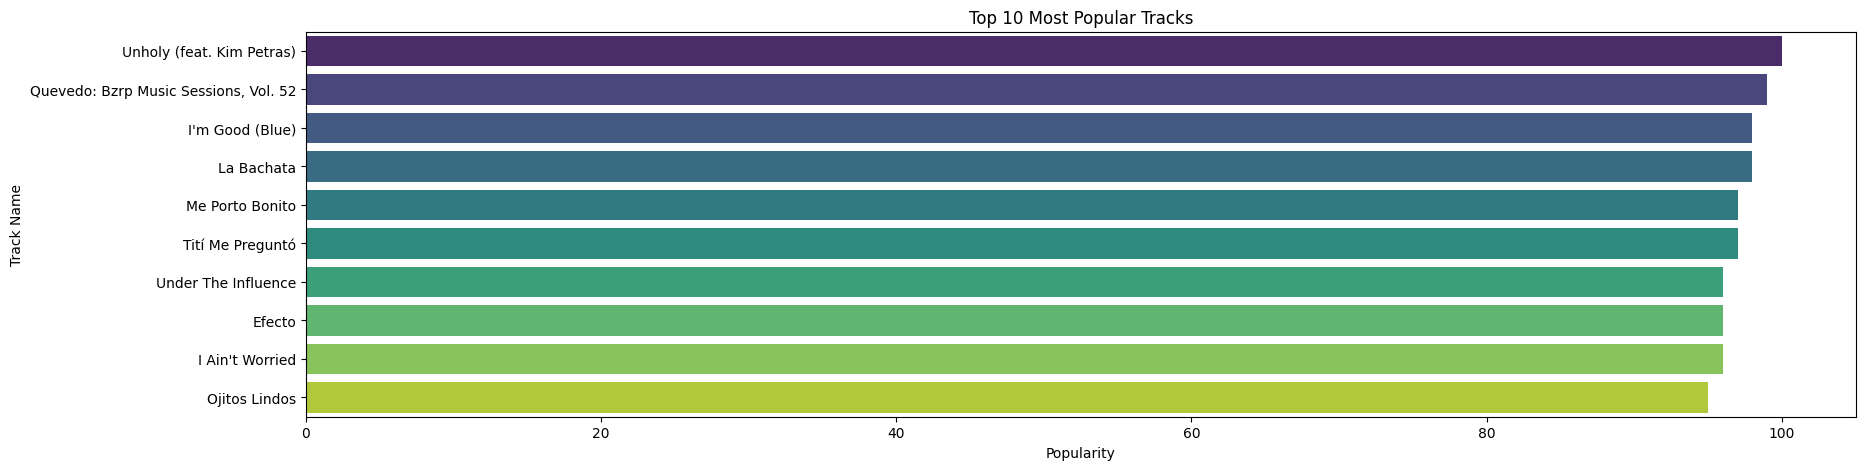

In [37]:
top_10_popular_tracks = df.nlargest(10, 'popularity')[['track_name', 'artists', 'popularity']] ## top 10 tracks

plt.figure(figsize=(20, 5))
sns.barplot(x='popularity', y='track_name', data=top_10_popular_tracks, palette='viridis')
plt.title('Top 10 Most Popular Tracks')
plt.xlabel('Popularity')
plt.ylabel('Track Name')
plt.show()

/tmp/ipykernel_3570/903871776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_popular_artists.values, y=top_10_popular_artists.index, palette='viridis')


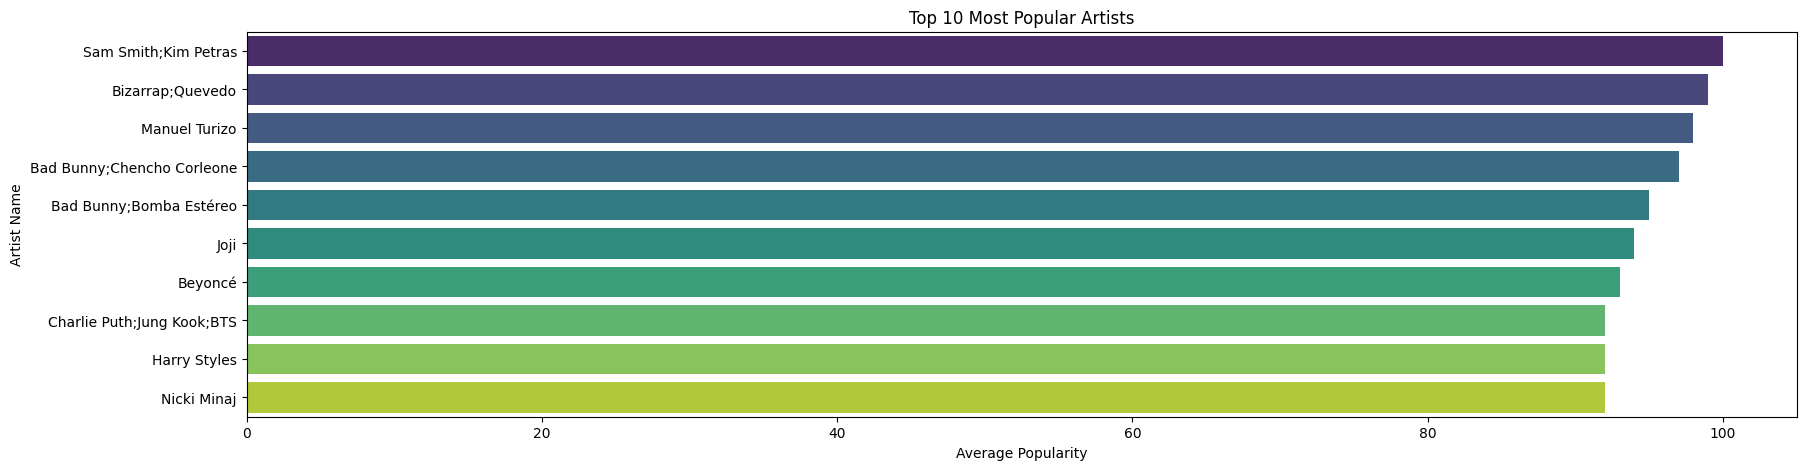

In [39]:
top_10_popular_artists = df.groupby('artists')['popularity'].mean().nlargest(10) ## top 10 artists

plt.figure(figsize=(20, 5))
sns.barplot(x=top_10_popular_artists.values, y=top_10_popular_artists.index, palette='viridis')
plt.title('Top 10 Most Popular Artists')
plt.xlabel('Average Popularity')
plt.ylabel('Artist Name')
plt.show()

/tmp/ipykernel_3570/455261257.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_popularity_by_genre.index, y=avg_popularity_by_genre.values, palette='Blues_d')


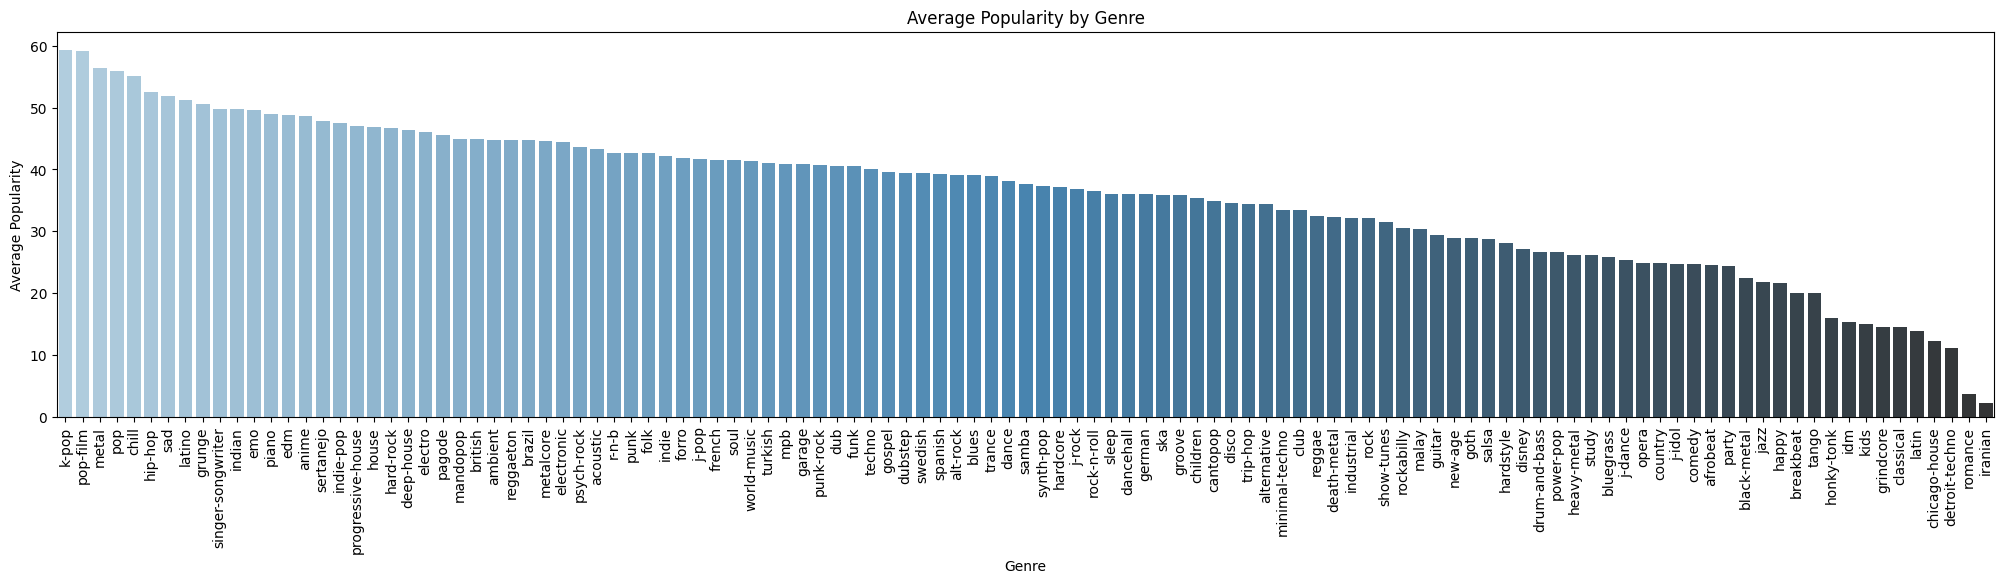

In [41]:
plt.figure(figsize=(25, 5)) ## most popular tracks by genre -> avg. popularity by genre
avg_popularity_by_genre = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
sns.barplot(x=avg_popularity_by_genre.index, y=avg_popularity_by_genre.values, palette='Blues_d')
plt.xticks(rotation=90)
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.show()

/tmp/ipykernel_3570/996861351.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')


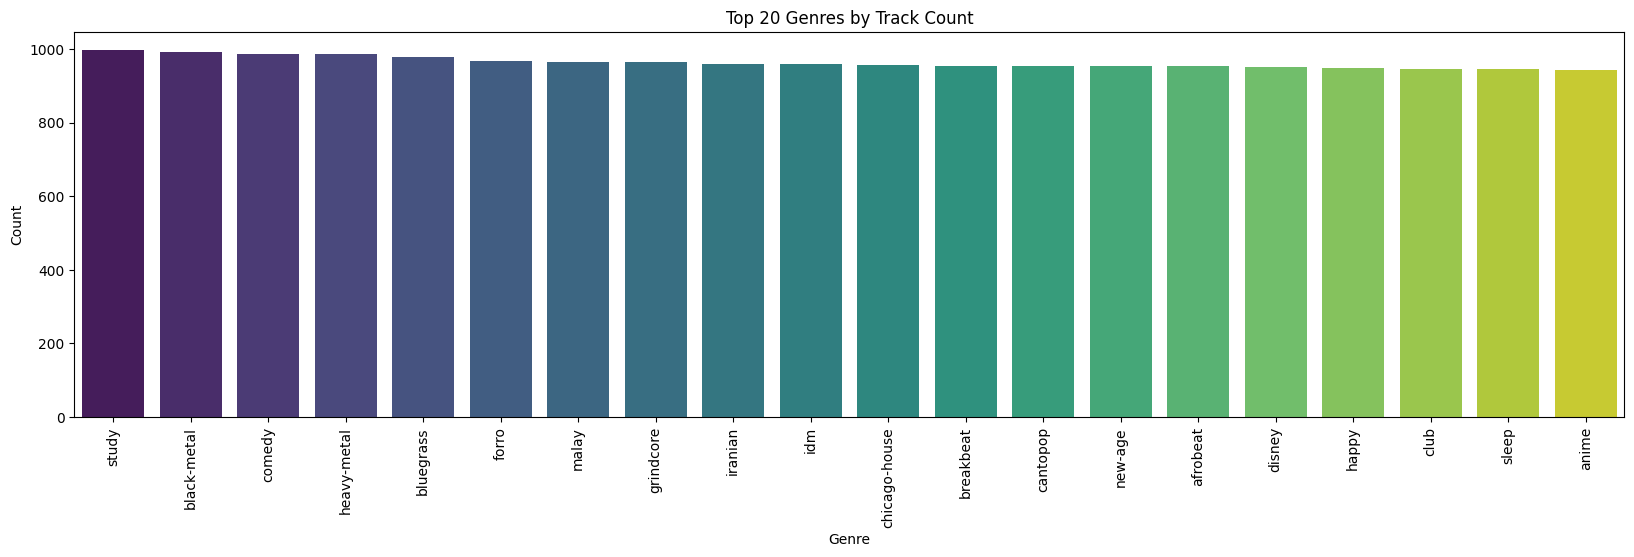

In [43]:
plt.figure(figsize=(20, 5)) ## top genres by track count -> most populated genres
top_genres = df['track_genre'].value_counts().head(20)
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 20 Genres by Track Count')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


/tmp/ipykernel_3570/2900755750.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_popular_genres.index, y=top_popular_genres.values, palette='viridis')


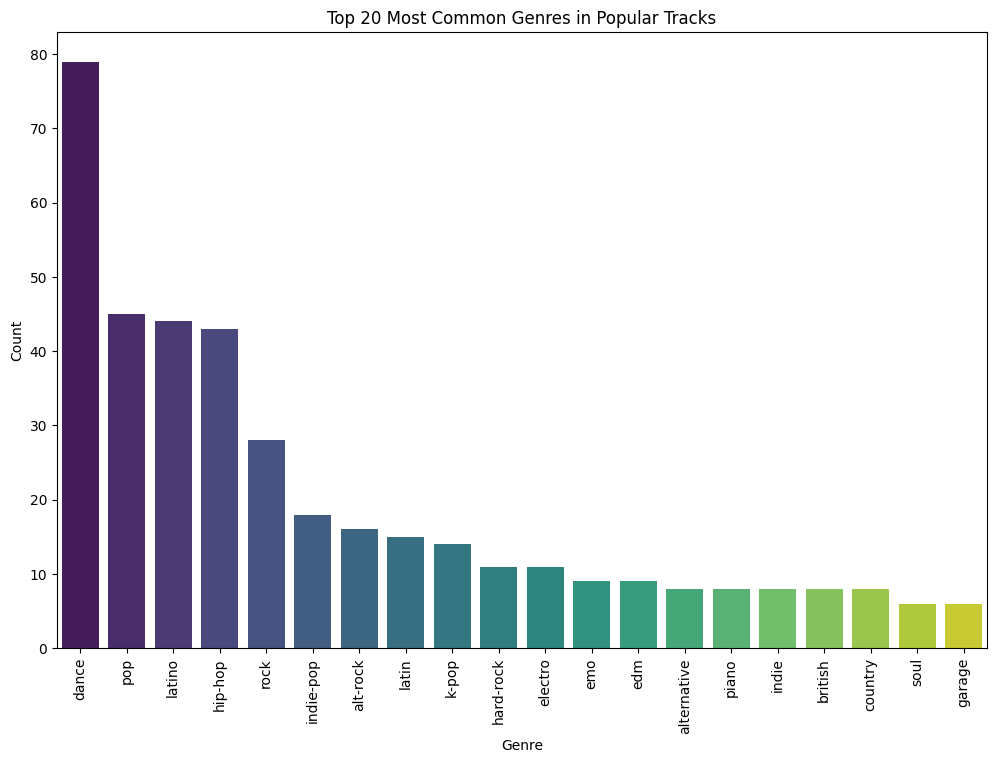

In [45]:
top_popular_tracks = df[df['popularity'] > 80] ## 20 most common genres among tracks that have a high popularity (>80).
top_popular_genres = top_popular_tracks['track_genre'].value_counts().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_popular_genres.index, y=top_popular_genres.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 20 Most Common Genres in Popular Tracks')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

## Modelling

In [50]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Save mapping of index to track metadata
df_features = df.reset_index(drop=True)

In [84]:
def generate_mood_playlist(df, features_scaled, track_id=None, track_name=None, artist=None, top_n=20):
    
    # Locate the song
    if track_id:
        match = df[df['track_id'] == track_id]
    elif track_name and artist:
        match = df[(df['track_name'].str.lower() == track_name.lower()) & 
                   (df['artists'].str.lower().str.contains(artist.lower()))]
    else:
        raise ValueError("Provide either a track_id or both track_name and artist.")

    if match.empty:
        raise ValueError("Song not found. Check the spelling or availability.")

    # Get the index of the matched track
    idx = match.index[0]

    # Compute cosine similarity
    sim_scores = cosine_similarity([features_scaled[idx]], features_scaled)[0]

    # Create a DataFrame of similarity scores
    sim_df = pd.DataFrame({
        'track_name': df['track_name'],
        'artist(s)': df['artists'],
        'track_id': df['track_id'],
        'track_genre': df['track_genre'],
        'similarity': np.round(sim_scores, 2)
    })

    # Remove the input song from results
    sim_df = sim_df[sim_df['track_id'] != df.loc[idx, 'track_id']]

    # Get top N similar songs
    recommended = sim_df.sort_values(by='similarity', ascending=False).head(top_n)

    return recommended


In [85]:
generate_mood_playlist(df_features, X, track_id="5Z01kGFWQcQA3XBRxjAzAJ")

,track_name,artist(s),track_id,track_genre,similarity
70356,I Won't Say (I'm In Love),Susan Egan;Cheryl Freeman;LaChanze;Vaneese Thomas;Lillias White;Disney,0PKmDncVOiNQLO6D1P6PXi,show-tunes,0.99
70411,"I Won't Say (I'm In Love) - From ""Hercules"" / Soundtrack Version",Susan Egan;Cheryl Freeman;LaChanze;Vaneese Thomas;Lillias White;Disney,3Dupb5AcaVFErlSSfl3szW,show-tunes,0.98
60848,Jiya Dhadak Dhadak Jaye,Rahat Fateh Ali Khan,5wQlXgGVSwvBVKXf5lmWhp,pop-film,0.98
29397,Drifting,Lonely in the Rain;Leo Stannard,4XANZ0xRF0vGRso3vJZVrF,french,0.97
70734,"I Won't Say (I'm In Love) - From ""Hercules""",Susan Egan;Cheryl Freeman;LaChanze;Vaneese Thomas;Lillias White;Disney,4p9nwYUhmGYmfIDYCmAdzQ,show-tunes,0.97
10691,男孩像你,Fiona Sit,0Yi8lfqXkblPopcXNUZlha,cantopop,0.96
44697,Dou Pal,Taha G;Maanu,59hkyI30Y03Zei8ITME2mz,indie-pop,0.96
60611,Mileya Mileya,Rekha Bhardwaj;Jigar Saraiya;Priya Andrews,1aqfzt5mpPoi7kYTFlfnIi,pop-film,0.96
76585,Tu parles trop,The Pirouettes,7J40nnJbQyreKOc3BTiuYD,synth-pop,0.95
76684,"So May We Start (feat. Simon Helberg) - Version Edit - From ""Annette""",Sparks;Adam Driver;Marion Cotillard;Simon Helberg,3GhKBlpYJLpel5wykSrXXK,synth-pop,0.95
